# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

2024-04-26 22:41:47.447683: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 22:41:48.387353: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Neural Networks tests


In [2]:
X_res = pd.read_csv("../cleaned_data/brfss_2022_X_rebalanced.csv").drop(columns = 'Unnamed: 0')
y_res = pd.read_csv("../cleaned_data/brfss_2022_y_rebalanced.csv").drop(columns = 'Unnamed: 0')

In [3]:
X_res_nn = X_res
y_res_nn = y_res.astype(int).to_numpy()

In [4]:
def initialize_model_1(): 
    
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=109, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

model_nn_1 = initialize_model_1()
model_nn_1.summary()

/home/gschacon/.pyenv/versions/3.10.6/envs/main/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-26 22:41:51.358328: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 22:41:51.358754: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,121 (113.75 KB)

 Trainable params: 29,121 (113.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history_1 = model_nn_1.fit(X_res_nn,y_res_nn, validation_split = 0.3, batch_size = 256, epochs = 1000, verbose = 1)

Epoch 1/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7764 - loss: 0.4725 - val_accuracy: 0.3711 - val_loss: 1.0734
Epoch 2/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7970 - loss: 0.4433 - val_accuracy: 0.5413 - val_loss: 0.8056
Epoch 3/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7964 - loss: 0.4418 - val_accuracy: 0.4730 - val_loss: 0.9743
Epoch 4/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7994 - loss: 0.4363 - val_accuracy: 0.4800 - val_loss: 0.8761
Epoch 5/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8029 - loss: 0.4291 - val_accuracy: 0.5100 - val_loss: 0.8127
Epoch 6/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8076 - loss: 0.4223 - val_accuracy: 0.5946 - val_loss: 0.6906
Epoch 7/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8092 - loss: 0.4195 - val_accuracy: 0.5654 - val_loss: 0.7462
Epoch 8/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8152 - loss: 0.4106 - 

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8822 - loss: 0.2881 - val_accuracy: 0.7712 - val_loss: 0.4283
Epoch 51/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8822 - loss: 0.2874 - val_accuracy: 0.7236 - val_loss: 0.5234
Epoch 52/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8842 - loss: 0.2843 - val_accuracy: 0.7502 - val_loss: 0.4799
Epoch 53/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8833 - loss: 0.2863 - val_accuracy: 0.7397 - val_loss: 0.5094
Epoch 54/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8834 - loss: 0.2839 - val_accuracy: 0.7379 - val_loss: 0.5148
Epoch 55/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8848 - loss: 0.2813 - val_accuracy: 0.7494 - val_loss: 0.4853
Epoch 56/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8855 - loss: 0.2820 - val_accuracy: 0.7068 - val_loss: 0.5551
Epoch 57/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8859 - loss: 0.2788 - val_ac

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9009 - loss: 0.2462 - val_accuracy: 0.8007 - val_loss: 0.4019
Epoch 100/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9022 - loss: 0.2458 - val_accuracy: 0.7737 - val_loss: 0.4564
Epoch 101/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9015 - loss: 0.2454 - val_accuracy: 0.7572 - val_loss: 0.4827
Epoch 102/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9018 - loss: 0.2462 - val_accuracy: 0.7660 - val_loss: 0.4844
Epoch 103/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9034 - loss: 0.2427 - val_accuracy: 0.7450 - val_loss: 0.5068
Epoch 104/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9030 - loss: 0.2440 - val_accuracy: 0.7729 - val_loss: 0.4477
Epoch 105/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9020 - loss: 0.2464 - val_accuracy: 0.7322 - val_loss: 0.5322
Epoch 106/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9034 - loss: 0.2423 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9094 - loss: 0.2285 - val_accuracy: 0.7710 - val_loss: 0.4644
Epoch 149/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9110 - loss: 0.2256 - val_accuracy: 0.7802 - val_loss: 0.4486
Epoch 150/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9117 - loss: 0.2233 - val_accuracy: 0.7417 - val_loss: 0.5356
Epoch 151/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9117 - loss: 0.2245 - val_accuracy: 0.7373 - val_loss: 0.5460
Epoch 152/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9110 - loss: 0.2251 - val_accuracy: 0.7697 - val_loss: 0.4770
Epoch 153/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9111 - loss: 0.2261 - val_accuracy: 0.7897 - val_loss: 0.4376
Epoch 154/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9106 - loss: 0.2244 - val_accuracy: 0.7673 - val_loss: 0.4813
Epoch 155/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9110 - loss: 0.2239 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9160 - loss: 0.2126 - val_accuracy: 0.7952 - val_loss: 0.4269
Epoch 198/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9170 - loss: 0.2119 - val_accuracy: 0.7834 - val_loss: 0.4552
Epoch 199/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9169 - loss: 0.2139 - val_accuracy: 0.7827 - val_loss: 0.4519
Epoch 200/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9172 - loss: 0.2118 - val_accuracy: 0.7924 - val_loss: 0.4375
Epoch 201/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9174 - loss: 0.2118 - val_accuracy: 0.7653 - val_loss: 0.5032
Epoch 202/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9180 - loss: 0.2119 - val_accuracy: 0.7979 - val_loss: 0.4298
Epoch 203/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9169 - loss: 0.2117 - val_accuracy: 0.7881 - val_loss: 0.4570
Epoch 204/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9170 - loss: 0.2126 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9216 - loss: 0.2006 - val_accuracy: 0.7613 - val_loss: 0.5290
Epoch 247/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9202 - loss: 0.2031 - val_accuracy: 0.7452 - val_loss: 0.5616
Epoch 248/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9204 - loss: 0.2036 - val_accuracy: 0.7901 - val_loss: 0.4470
Epoch 249/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9212 - loss: 0.2028 - val_accuracy: 0.7987 - val_loss: 0.4246
Epoch 250/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9219 - loss: 0.2008 - val_accuracy: 0.7900 - val_loss: 0.4606
Epoch 251/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9220 - loss: 0.2005 - val_accuracy: 0.7917 - val_loss: 0.4706
Epoch 252/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9211 - loss: 0.2020 - val_accuracy: 0.7999 - val_loss: 0.4232
Epoch 253/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9221 - loss: 0.2009 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9255 - loss: 0.1924 - val_accuracy: 0.7732 - val_loss: 0.4972
Epoch 296/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9249 - loss: 0.1933 - val_accuracy: 0.7854 - val_loss: 0.4704
Epoch 297/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9245 - loss: 0.1952 - val_accuracy: 0.7972 - val_loss: 0.4670
Epoch 298/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9261 - loss: 0.1920 - val_accuracy: 0.7508 - val_loss: 0.5570
Epoch 299/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9240 - loss: 0.1946 - val_accuracy: 0.7738 - val_loss: 0.5120
Epoch 300/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9237 - loss: 0.1957 - val_accuracy: 0.8087 - val_loss: 0.4357
Epoch 301/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9246 - loss: 0.1941 - val_accuracy: 0.7856 - val_loss: 0.4755
Epoch 302/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9246 - loss: 0.1925 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9282 - loss: 0.1848 - val_accuracy: 0.7504 - val_loss: 0.5878
Epoch 345/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9262 - loss: 0.1899 - val_accuracy: 0.8053 - val_loss: 0.4426
Epoch 346/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9277 - loss: 0.1867 - val_accuracy: 0.8046 - val_loss: 0.4556
Epoch 347/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9272 - loss: 0.1896 - val_accuracy: 0.7920 - val_loss: 0.4799
Epoch 348/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9282 - loss: 0.1866 - val_accuracy: 0.7849 - val_loss: 0.5041
Epoch 349/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9268 - loss: 0.1885 - val_accuracy: 0.7722 - val_loss: 0.5200
Epoch 350/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9281 - loss: 0.1861 - val_accuracy: 0.7923 - val_loss: 0.4704
Epoch 351/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9277 - loss: 0.1878 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9297 - loss: 0.1818 - val_accuracy: 0.7849 - val_loss: 0.5073
Epoch 394/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9289 - loss: 0.1836 - val_accuracy: 0.7842 - val_loss: 0.5189
Epoch 395/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9297 - loss: 0.1820 - val_accuracy: 0.7598 - val_loss: 0.5635
Epoch 396/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9301 - loss: 0.1818 - val_accuracy: 0.8037 - val_loss: 0.4660
Epoch 397/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9298 - loss: 0.1831 - val_accuracy: 0.7789 - val_loss: 0.5205
Epoch 398/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9301 - loss: 0.1820 - val_accuracy: 0.7933 - val_loss: 0.5058
Epoch 399/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9298 - loss: 0.1829 - val_accuracy: 0.7928 - val_loss: 0.4933
Epoch 400/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9300 - loss: 0.1822 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9317 - loss: 0.1788 - val_accuracy: 0.7672 - val_loss: 0.5681
Epoch 443/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9297 - loss: 0.1809 - val_accuracy: 0.7927 - val_loss: 0.5022
Epoch 444/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9329 - loss: 0.1762 - val_accuracy: 0.7941 - val_loss: 0.4795
Epoch 445/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9316 - loss: 0.1766 - val_accuracy: 0.7674 - val_loss: 0.5700
Epoch 446/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9307 - loss: 0.1787 - val_accuracy: 0.7968 - val_loss: 0.4887
Epoch 447/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9316 - loss: 0.1773 - val_accuracy: 0.8028 - val_loss: 0.4677
Epoch 448/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9316 - loss: 0.1770 - val_accuracy: 0.7752 - val_loss: 0.5269
Epoch 449/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9318 - loss: 0.1766 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9329 - loss: 0.1742 - val_accuracy: 0.7894 - val_loss: 0.5302
Epoch 492/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9320 - loss: 0.1752 - val_accuracy: 0.7892 - val_loss: 0.5327
Epoch 493/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9326 - loss: 0.1752 - val_accuracy: 0.7748 - val_loss: 0.5591
Epoch 494/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9323 - loss: 0.1764 - val_accuracy: 0.7926 - val_loss: 0.5078
Epoch 495/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9342 - loss: 0.1726 - val_accuracy: 0.7918 - val_loss: 0.5113
Epoch 496/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9334 - loss: 0.1722 - val_accuracy: 0.8061 - val_loss: 0.4809
Epoch 497/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9311 - loss: 0.1786 - val_accuracy: 0.7895 - val_loss: 0.5175
Epoch 498/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9333 - loss: 0.1738 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9339 - loss: 0.1720 - val_accuracy: 0.8069 - val_loss: 0.4855
Epoch 541/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9328 - loss: 0.1739 - val_accuracy: 0.7996 - val_loss: 0.5050
Epoch 542/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9348 - loss: 0.1696 - val_accuracy: 0.7922 - val_loss: 0.5187
Epoch 543/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9357 - loss: 0.1695 - val_accuracy: 0.8126 - val_loss: 0.4488
Epoch 544/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9336 - loss: 0.1724 - val_accuracy: 0.8029 - val_loss: 0.4803
Epoch 545/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9352 - loss: 0.1702 - val_accuracy: 0.7840 - val_loss: 0.5372
Epoch 546/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9356 - loss: 0.1690 - val_accuracy: 0.7931 - val_loss: 0.5067
Epoch 547/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9338 - loss: 0.1736 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9357 - loss: 0.1690 - val_accuracy: 0.7844 - val_loss: 0.5432
Epoch 590/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9350 - loss: 0.1689 - val_accuracy: 0.7958 - val_loss: 0.5109
Epoch 591/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9356 - loss: 0.1670 - val_accuracy: 0.7877 - val_loss: 0.5343
Epoch 592/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9359 - loss: 0.1680 - val_accuracy: 0.7774 - val_loss: 0.5457
Epoch 593/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9358 - loss: 0.1672 - val_accuracy: 0.7918 - val_loss: 0.5412
Epoch 594/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9357 - loss: 0.1686 - val_accuracy: 0.7969 - val_loss: 0.5213
Epoch 595/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9358 - loss: 0.1670 - val_accuracy: 0.7871 - val_loss: 0.5383
Epoch 596/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9362 - loss: 0.1673 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9369 - loss: 0.1650 - val_accuracy: 0.7765 - val_loss: 0.5936
Epoch 639/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9363 - loss: 0.1648 - val_accuracy: 0.7795 - val_loss: 0.5700
Epoch 640/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9365 - loss: 0.1648 - val_accuracy: 0.7819 - val_loss: 0.5464
Epoch 641/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9358 - loss: 0.1668 - val_accuracy: 0.8034 - val_loss: 0.5204
Epoch 642/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9370 - loss: 0.1649 - val_accuracy: 0.8054 - val_loss: 0.4955
Epoch 643/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9365 - loss: 0.1661 - val_accuracy: 0.8060 - val_loss: 0.4845
Epoch 644/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9367 - loss: 0.1664 - val_accuracy: 0.7836 - val_loss: 0.5592
Epoch 645/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9368 - loss: 0.1663 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9379 - loss: 0.1631 - val_accuracy: 0.7882 - val_loss: 0.5625
Epoch 688/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9385 - loss: 0.1612 - val_accuracy: 0.7779 - val_loss: 0.5754
Epoch 689/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9380 - loss: 0.1609 - val_accuracy: 0.7951 - val_loss: 0.5269
Epoch 690/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9364 - loss: 0.1670 - val_accuracy: 0.8157 - val_loss: 0.4625
Epoch 691/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9369 - loss: 0.1653 - val_accuracy: 0.7676 - val_loss: 0.6040
Epoch 692/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9389 - loss: 0.1599 - val_accuracy: 0.7894 - val_loss: 0.5477
Epoch 693/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9378 - loss: 0.1644 - val_accuracy: 0.8022 - val_loss: 0.5373
Epoch 694/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9388 - loss: 0.1611 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9385 - loss: 0.1614 - val_accuracy: 0.8090 - val_loss: 0.4903
Epoch 737/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9394 - loss: 0.1603 - val_accuracy: 0.8018 - val_loss: 0.5402
Epoch 738/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9389 - loss: 0.1617 - val_accuracy: 0.7742 - val_loss: 0.6239
Epoch 739/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9388 - loss: 0.1619 - val_accuracy: 0.7982 - val_loss: 0.5475
Epoch 740/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9384 - loss: 0.1617 - val_accuracy: 0.7783 - val_loss: 0.5808
Epoch 741/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9395 - loss: 0.1593 - val_accuracy: 0.7902 - val_loss: 0.5686
Epoch 742/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9405 - loss: 0.1568 - val_accuracy: 0.7957 - val_loss: 0.5495
Epoch 743/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9380 - loss: 0.1618 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9404 - loss: 0.1574 - val_accuracy: 0.8073 - val_loss: 0.5086
Epoch 786/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9390 - loss: 0.1603 - val_accuracy: 0.8064 - val_loss: 0.5133
Epoch 787/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9395 - loss: 0.1586 - val_accuracy: 0.7842 - val_loss: 0.5895
Epoch 788/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9384 - loss: 0.1628 - val_accuracy: 0.8039 - val_loss: 0.5189
Epoch 789/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9405 - loss: 0.1580 - val_accuracy: 0.7825 - val_loss: 0.5965
Epoch 790/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9388 - loss: 0.1615 - val_accuracy: 0.7898 - val_loss: 0.5567
Epoch 791/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9399 - loss: 0.1588 - val_accuracy: 0.7823 - val_loss: 0.5951
Epoch 792/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9389 - loss: 0.1611 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9405 - loss: 0.1569 - val_accuracy: 0.7820 - val_loss: 0.5812
Epoch 835/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9401 - loss: 0.1583 - val_accuracy: 0.7825 - val_loss: 0.5961
Epoch 836/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9409 - loss: 0.1562 - val_accuracy: 0.7881 - val_loss: 0.5884
Epoch 837/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9398 - loss: 0.1589 - val_accuracy: 0.7838 - val_loss: 0.5879
Epoch 838/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9407 - loss: 0.1559 - val_accuracy: 0.7835 - val_loss: 0.5903
Epoch 839/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9407 - loss: 0.1553 - val_accuracy: 0.7910 - val_loss: 0.5663
Epoch 840/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9407 - loss: 0.1577 - val_accuracy: 0.8017 - val_loss: 0.5402
Epoch 841/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9406 - loss: 0.1578 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9405 - loss: 0.1598 - val_accuracy: 0.7974 - val_loss: 0.5571
Epoch 884/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9425 - loss: 0.1529 - val_accuracy: 0.8069 - val_loss: 0.5131
Epoch 885/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9411 - loss: 0.1559 - val_accuracy: 0.7890 - val_loss: 0.5811
Epoch 886/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9426 - loss: 0.1532 - val_accuracy: 0.7968 - val_loss: 0.5564
Epoch 887/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9407 - loss: 0.1551 - val_accuracy: 0.8110 - val_loss: 0.5188
Epoch 888/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9413 - loss: 0.1562 - val_accuracy: 0.8061 - val_loss: 0.5549
Epoch 889/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9413 - loss: 0.1540 - val_accuracy: 0.7880 - val_loss: 0.5940
Epoch 890/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9415 - loss: 0.1555 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9425 - loss: 0.1521 - val_accuracy: 0.7904 - val_loss: 0.5878
Epoch 933/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9398 - loss: 0.1595 - val_accuracy: 0.8032 - val_loss: 0.5579
Epoch 934/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9430 - loss: 0.1522 - val_accuracy: 0.8137 - val_loss: 0.4990
Epoch 935/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9417 - loss: 0.1526 - val_accuracy: 0.7702 - val_loss: 0.6633
Epoch 936/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9416 - loss: 0.1540 - val_accuracy: 0.7847 - val_loss: 0.6047
Epoch 937/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9424 - loss: 0.1530 - val_accuracy: 0.8049 - val_loss: 0.5476
Epoch 938/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9421 - loss: 0.1512 - val_accuracy: 0.7894 - val_loss: 0.5624
Epoch 939/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9414 - loss: 0.1563 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9431 - loss: 0.1522 - val_accuracy: 0.7958 - val_loss: 0.5762
Epoch 982/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9422 - loss: 0.1529 - val_accuracy: 0.7990 - val_loss: 0.5736
Epoch 983/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9424 - loss: 0.1531 - val_accuracy: 0.8138 - val_loss: 0.5318
Epoch 984/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9417 - loss: 0.1538 - val_accuracy: 0.7931 - val_loss: 0.5992
Epoch 985/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9417 - loss: 0.1543 - val_accuracy: 0.7814 - val_loss: 0.6136
Epoch 986/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9422 - loss: 0.1524 - val_accuracy: 0.7833 - val_loss: 0.6019
Epoch 987/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9428 - loss: 0.1532 - val_accuracy: 0.8111 - val_loss: 0.5163
Epoch 988/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9436 - loss: 0.1507 -

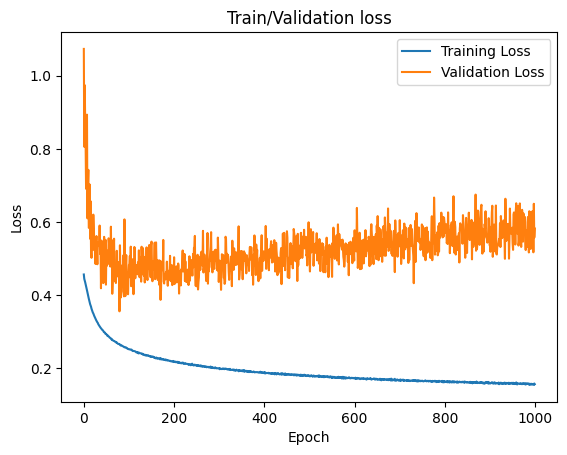

In [6]:
def plot_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Train/Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
plot_history(history_1)

In [7]:
np.array(history_1.history['val_accuracy']).max()

0.834567129611969

In [8]:
def initialize_model_2(): 
    
    model = models.Sequential()
    model.add(layers.Dense(256, input_dim=109, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

model_nn_2 = initialize_model_2()
model_nn_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,249 (965.82 KB)

 Trainable params: 247,249 (965.82 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_2 = model_nn_2.fit(X_res_nn,y_res_nn, validation_split = 0.3, batch_size = 256, epochs = 1000, verbose = 1)

Epoch 1/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7714 - loss: 0.4814 - val_accuracy: 0.4278 - val_loss: 0.8558
Epoch 2/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7971 - loss: 0.4447 - val_accuracy: 0.5224 - val_loss: 0.8164
Epoch 3/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8024 - loss: 0.4348 - val_accuracy: 0.5945 - val_loss: 0.6973
Epoch 4/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8072 - loss: 0.4268 - val_accuracy: 0.5506 - val_loss: 0.7622
Epoch 5/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8116 - loss: 0.4196 - val_accuracy: 0.5555 - val_loss: 0.7315
Epoch 6/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8193 - loss: 0.4067 - val_accuracy: 0.6481 - val_loss: 0.6127
Epoch 7/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8255 - loss: 0.3961 - val_accuracy: 0.6670 - val_loss: 0.5800
Epoch 8/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8360 - loss: 0.3780 - 

706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9703 - loss: 0.0791 - val_accuracy: 0.9174 - val_loss: 0.1797
Epoch 51/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9715 - loss: 0.0766 - val_accuracy: 0.9234 - val_loss: 0.1898
Epoch 52/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9710 - loss: 0.0763 - val_accuracy: 0.9175 - val_loss: 0.1824
Epoch 53/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9721 - loss: 0.0738 - val_accuracy: 0.9186 - val_loss: 0.1960
Epoch 54/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9719 - loss: 0.0744 - val_accuracy: 0.9036 - val_loss: 0.2097
Epoch 55/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9728 - loss: 0.0704 - val_accuracy: 0.9158 - val_loss: 0.2084
Epoch 56/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9738 - loss: 0.0702 - val_accuracy: 0.9227 - val_loss: 0.1859
Epoch 57/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9742 - loss: 0.0686 - val_ac

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9840 - loss: 0.0428 - val_accuracy: 0.9375 - val_loss: 0.1883
Epoch 100/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9843 - loss: 0.0403 - val_accuracy: 0.9371 - val_loss: 0.1655
Epoch 101/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9843 - loss: 0.0424 - val_accuracy: 0.9420 - val_loss: 0.1606
Epoch 102/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9839 - loss: 0.0425 - val_accuracy: 0.9400 - val_loss: 0.1830
Epoch 103/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9854 - loss: 0.0389 - val_accuracy: 0.9315 - val_loss: 0.1751
Epoch 104/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9846 - loss: 0.0404 - val_accuracy: 0.9305 - val_loss: 0.1984
Epoch 105/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9850 - loss: 0.0391 - val_accuracy: 0.9378 - val_loss: 0.1743
Epoch 106/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9855 - loss: 0.0383 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9892 - loss: 0.0285 - val_accuracy: 0.9430 - val_loss: 0.1927
Epoch 149/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0289 - val_accuracy: 0.9455 - val_loss: 0.1608
Epoch 150/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0284 - val_accuracy: 0.9351 - val_loss: 0.2060
Epoch 151/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9890 - loss: 0.0293 - val_accuracy: 0.9330 - val_loss: 0.2173
Epoch 152/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9894 - loss: 0.0288 - val_accuracy: 0.9274 - val_loss: 0.2179
Epoch 153/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0288 - val_accuracy: 0.9471 - val_loss: 0.1648
Epoch 154/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0283 - val_accuracy: 0.9380 - val_loss: 0.1935
Epoch 155/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9896 - loss: 0.0280 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9914 - loss: 0.0221 - val_accuracy: 0.9412 - val_loss: 0.2053
Epoch 198/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9910 - loss: 0.0233 - val_accuracy: 0.9446 - val_loss: 0.1999
Epoch 199/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9912 - loss: 0.0228 - val_accuracy: 0.9412 - val_loss: 0.1852
Epoch 200/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9912 - loss: 0.0228 - val_accuracy: 0.9359 - val_loss: 0.2517
Epoch 201/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9913 - loss: 0.0225 - val_accuracy: 0.9438 - val_loss: 0.1836
Epoch 202/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9915 - loss: 0.0223 - val_accuracy: 0.9434 - val_loss: 0.1955
Epoch 203/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9912 - loss: 0.0236 - val_accuracy: 0.9519 - val_loss: 0.1473
Epoch 204/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9916 - loss: 0.0217 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9931 - loss: 0.0172 - val_accuracy: 0.9350 - val_loss: 0.2481
Epoch 247/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9927 - loss: 0.0190 - val_accuracy: 0.9470 - val_loss: 0.1880
Epoch 248/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9925 - loss: 0.0186 - val_accuracy: 0.9377 - val_loss: 0.2194
Epoch 249/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9927 - loss: 0.0185 - val_accuracy: 0.9520 - val_loss: 0.1682
Epoch 250/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9927 - loss: 0.0195 - val_accuracy: 0.9451 - val_loss: 0.2212
Epoch 251/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9931 - loss: 0.0179 - val_accuracy: 0.9324 - val_loss: 0.2771
Epoch 252/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9932 - loss: 0.0177 - val_accuracy: 0.9327 - val_loss: 0.2402
Epoch 253/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9924 - loss: 0.0197 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9941 - loss: 0.0154 - val_accuracy: 0.9429 - val_loss: 0.2101
Epoch 296/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9932 - loss: 0.0175 - val_accuracy: 0.9487 - val_loss: 0.1789
Epoch 297/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9938 - loss: 0.0161 - val_accuracy: 0.9415 - val_loss: 0.2170
Epoch 298/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9942 - loss: 0.0146 - val_accuracy: 0.9381 - val_loss: 0.2312
Epoch 299/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9941 - loss: 0.0154 - val_accuracy: 0.9424 - val_loss: 0.2071
Epoch 300/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9935 - loss: 0.0162 - val_accuracy: 0.9418 - val_loss: 0.2212
Epoch 301/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9938 - loss: 0.0159 - val_accuracy: 0.9376 - val_loss: 0.2067
Epoch 302/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9941 - loss: 0.0154 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9933 - loss: 0.0176 - val_accuracy: 0.9439 - val_loss: 0.2152
Epoch 345/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9945 - loss: 0.0137 - val_accuracy: 0.9476 - val_loss: 0.1847
Epoch 346/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9948 - loss: 0.0128 - val_accuracy: 0.9504 - val_loss: 0.1852
Epoch 347/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9939 - loss: 0.0160 - val_accuracy: 0.9465 - val_loss: 0.2041
Epoch 348/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9948 - loss: 0.0139 - val_accuracy: 0.9379 - val_loss: 0.2273
Epoch 349/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9947 - loss: 0.0135 - val_accuracy: 0.9434 - val_loss: 0.2201
Epoch 350/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9947 - loss: 0.0134 - val_accuracy: 0.9398 - val_loss: 0.2000
Epoch 351/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9945 - loss: 0.0141 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9956 - loss: 0.0109 - val_accuracy: 0.9422 - val_loss: 0.2137
Epoch 394/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9941 - loss: 0.0159 - val_accuracy: 0.9449 - val_loss: 0.2040
Epoch 395/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0129 - val_accuracy: 0.9361 - val_loss: 0.1991
Epoch 396/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9928 - loss: 0.0203 - val_accuracy: 0.9491 - val_loss: 0.1907
Epoch 397/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9960 - loss: 0.0103 - val_accuracy: 0.9377 - val_loss: 0.2476
Epoch 398/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9958 - loss: 0.0106 - val_accuracy: 0.9470 - val_loss: 0.2213
Epoch 399/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9957 - loss: 0.0117 - val_accuracy: 0.9493 - val_loss: 0.1884
Epoch 400/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9959 - loss: 0.0113 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9959 - loss: 0.0102 - val_accuracy: 0.9438 - val_loss: 0.2363
Epoch 443/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9960 - loss: 0.0099 - val_accuracy: 0.9434 - val_loss: 0.2586
Epoch 444/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0128 - val_accuracy: 0.9445 - val_loss: 0.2162
Epoch 445/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0121 - val_accuracy: 0.9455 - val_loss: 0.2058
Epoch 446/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9954 - loss: 0.0125 - val_accuracy: 0.9422 - val_loss: 0.2463
Epoch 447/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9897 - loss: 0.0311 - val_accuracy: 0.9459 - val_loss: 0.2107
Epoch 448/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9955 - loss: 0.0122 - val_accuracy: 0.9421 - val_loss: 0.2470
Epoch 449/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9960 - loss: 0.0105 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9962 - loss: 0.0104 - val_accuracy: 0.9447 - val_loss: 0.2062
Epoch 492/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0125 - val_accuracy: 0.9537 - val_loss: 0.1780
Epoch 493/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9962 - loss: 0.0099 - val_accuracy: 0.9399 - val_loss: 0.2362
Epoch 494/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9957 - loss: 0.0116 - val_accuracy: 0.9239 - val_loss: 0.2423
Epoch 495/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9929 - loss: 0.0197 - val_accuracy: 0.9424 - val_loss: 0.2431
Epoch 496/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9962 - loss: 0.0096 - val_accuracy: 0.9354 - val_loss: 0.2702
Epoch 497/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9961 - loss: 0.0103 - val_accuracy: 0.9465 - val_loss: 0.2158
Epoch 498/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9958 - loss: 0.0111 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9970 - loss: 0.0075 - val_accuracy: 0.9437 - val_loss: 0.2535
Epoch 541/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9965 - loss: 0.0090 - val_accuracy: 0.9370 - val_loss: 0.2376
Epoch 542/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0132 - val_accuracy: 0.9399 - val_loss: 0.2870
Epoch 543/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9970 - loss: 0.0074 - val_accuracy: 0.9422 - val_loss: 0.2632
Epoch 544/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9971 - loss: 0.0076 - val_accuracy: 0.9382 - val_loss: 0.2882
Epoch 545/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9954 - loss: 0.0152 - val_accuracy: 0.9434 - val_loss: 0.2489
Epoch 546/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9970 - loss: 0.0078 - val_accuracy: 0.9343 - val_loss: 0.2946
Epoch 547/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9966 - loss: 0.0083 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9455 - val_loss: 0.2094
Epoch 590/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9963 - loss: 0.0105 - val_accuracy: 0.9318 - val_loss: 0.2643
Epoch 591/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9964 - loss: 0.0093 - val_accuracy: 0.9365 - val_loss: 0.3171
Epoch 592/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9966 - loss: 0.0085 - val_accuracy: 0.9428 - val_loss: 0.2583
Epoch 593/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9966 - loss: 0.0080 - val_accuracy: 0.9501 - val_loss: 0.2118
Epoch 594/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9957 - loss: 0.0109 - val_accuracy: 0.9411 - val_loss: 0.2832
Epoch 595/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9970 - loss: 0.0077 - val_accuracy: 0.9413 - val_loss: 0.2526
Epoch 596/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9968 - loss: 0.0088 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9411 - val_loss: 0.3055
Epoch 639/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9974 - loss: 0.0084 - val_accuracy: 0.9482 - val_loss: 0.2086
Epoch 640/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9964 - loss: 0.0101 - val_accuracy: 0.9458 - val_loss: 0.2349
Epoch 641/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9936 - loss: 0.0188 - val_accuracy: 0.9419 - val_loss: 0.2385
Epoch 642/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9970 - loss: 0.0083 - val_accuracy: 0.9445 - val_loss: 0.2777
Epoch 643/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0125 - val_accuracy: 0.9385 - val_loss: 0.3457
Epoch 644/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9969 - loss: 0.0082 - val_accuracy: 0.9413 - val_loss: 0.3086
Epoch 645/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9972 - loss: 0.0072 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9971 - loss: 0.0075 - val_accuracy: 0.9412 - val_loss: 0.2798
Epoch 688/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9970 - loss: 0.0078 - val_accuracy: 0.9455 - val_loss: 0.2633
Epoch 689/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9968 - loss: 0.0091 - val_accuracy: 0.9461 - val_loss: 0.2632
Epoch 690/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9965 - loss: 0.0086 - val_accuracy: 0.9386 - val_loss: 0.3048
Epoch 691/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9968 - loss: 0.0088 - val_accuracy: 0.9329 - val_loss: 0.2642
Epoch 692/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.9405 - val_loss: 0.2821
Epoch 693/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9970 - loss: 0.0080 - val_accuracy: 0.9269 - val_loss: 0.2690
Epoch 694/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9959 - loss: 0.0115 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9974 - loss: 0.0072 - val_accuracy: 0.9401 - val_loss: 0.2523
Epoch 737/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9961 - loss: 0.0105 - val_accuracy: 0.9326 - val_loss: 0.3395
Epoch 738/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9969 - loss: 0.0084 - val_accuracy: 0.9346 - val_loss: 0.3109
Epoch 739/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9970 - loss: 0.0080 - val_accuracy: 0.9440 - val_loss: 0.2456
Epoch 740/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9967 - loss: 0.0086 - val_accuracy: 0.9443 - val_loss: 0.2157
Epoch 741/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9960 - loss: 0.0108 - val_accuracy: 0.9361 - val_loss: 0.2449
Epoch 742/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9971 - loss: 0.0087 - val_accuracy: 0.9314 - val_loss: 0.3447
Epoch 743/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9972 - loss: 0.0079 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9386 - val_loss: 0.2770
Epoch 786/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9971 - loss: 0.0078 - val_accuracy: 0.9418 - val_loss: 0.2879
Epoch 787/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9969 - loss: 0.0082 - val_accuracy: 0.9355 - val_loss: 0.2917
Epoch 788/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9973 - loss: 0.0074 - val_accuracy: 0.9484 - val_loss: 0.2472
Epoch 789/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9968 - loss: 0.0083 - val_accuracy: 0.9437 - val_loss: 0.2484
Epoch 790/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9968 - loss: 0.0081 - val_accuracy: 0.9412 - val_loss: 0.2796
Epoch 791/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9972 - loss: 0.0075 - val_accuracy: 0.9306 - val_loss: 0.3523
Epoch 792/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9972 - loss: 0.0074 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9977 - loss: 0.0065 - val_accuracy: 0.9428 - val_loss: 0.2826
Epoch 835/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9975 - loss: 0.0065 - val_accuracy: 0.9482 - val_loss: 0.2711
Epoch 836/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9960 - loss: 0.0141 - val_accuracy: 0.9363 - val_loss: 0.2743
Epoch 837/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9964 - loss: 0.0234 - val_accuracy: 0.9370 - val_loss: 0.2843
Epoch 838/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9434 - val_loss: 0.2680
Epoch 839/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9978 - loss: 0.0060 - val_accuracy: 0.9428 - val_loss: 0.3049
Epoch 840/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9979 - loss: 0.0059 - val_accuracy: 0.9389 - val_loss: 0.3217
Epoch 841/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9975 - loss: 0.0067 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9973 - loss: 0.0072 - val_accuracy: 0.9409 - val_loss: 0.3053
Epoch 884/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9452 - val_loss: 0.2582
Epoch 885/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9970 - loss: 0.0079 - val_accuracy: 0.9373 - val_loss: 0.3249
Epoch 886/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9971 - loss: 0.0071 - val_accuracy: 0.9314 - val_loss: 0.4004
Epoch 887/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9402 - val_loss: 0.2700
Epoch 888/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9970 - loss: 0.0144 - val_accuracy: 0.9304 - val_loss: 0.2771
Epoch 889/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9427 - val_loss: 0.2954
Epoch 890/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9980 - loss: 0.0052 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.9428 - val_loss: 0.3153
Epoch 933/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9400 - val_loss: 0.3185
Epoch 934/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9974 - loss: 0.0072 - val_accuracy: 0.9421 - val_loss: 0.3518
Epoch 935/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9978 - loss: 0.0063 - val_accuracy: 0.9393 - val_loss: 0.2923
Epoch 936/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9974 - loss: 0.0070 - val_accuracy: 0.9409 - val_loss: 0.2806
Epoch 937/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9975 - loss: 0.0064 - val_accuracy: 0.9380 - val_loss: 0.3239
Epoch 938/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9968 - loss: 0.0095 - val_accuracy: 0.9380 - val_loss: 0.2868
Epoch 939/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9974 - loss: 0.0071 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 0.9413 - val_loss: 0.2869
Epoch 982/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9979 - loss: 0.0058 - val_accuracy: 0.9362 - val_loss: 0.3368
Epoch 983/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9975 - loss: 0.0060 - val_accuracy: 0.9415 - val_loss: 0.2698
Epoch 984/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9981 - loss: 0.0055 - val_accuracy: 0.9452 - val_loss: 0.2733
Epoch 985/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9977 - loss: 0.0058 - val_accuracy: 0.9443 - val_loss: 0.3122
Epoch 986/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9978 - loss: 0.0056 - val_accuracy: 0.9368 - val_loss: 0.3627
Epoch 987/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.9315 - val_loss: 0.3076
Epoch 988/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9969 - loss: 0.0089 -

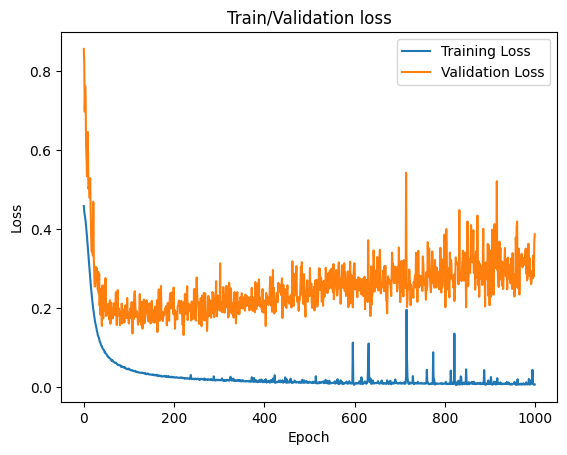

In [10]:
plot_history(history_2)

In [11]:
np.array(history_2.history['val_accuracy']).max()

0.9536969065666199

In [12]:
def initialize_model_3(): 
    
    model = models.Sequential()
    model.add(layers.Dense(256, input_dim=109, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

model_nn_3 = initialize_model_3()
model_nn_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 256)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,249 (965.82 KB)

 Trainable params: 247,249 (965.82 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_3 = model_nn_3.fit(X_res_nn,y_res_nn, validation_split = 0.3, batch_size = 256, epochs = 1000, verbose = 1)

Epoch 1/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7598 - loss: 0.4946 - val_accuracy: 0.4870 - val_loss: 0.8032
Epoch 2/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7975 - loss: 0.4440 - val_accuracy: 0.5015 - val_loss: 0.8377
Epoch 3/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8004 - loss: 0.4402 - val_accuracy: 0.5807 - val_loss: 0.6579
Epoch 4/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8068 - loss: 0.4300 - val_accuracy: 0.5867 - val_loss: 0.7054
Epoch 5/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8096 - loss: 0.4244 - val_accuracy: 0.5582 - val_loss: 0.7080
Epoch 6/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8157 - loss: 0.4146 - val_accuracy: 0.6027 - val_loss: 0.7385
Epoch 7/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8199 - loss: 0.4069 - val_accuracy: 0.6308 - val_loss: 0.6380
Epoch 8/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8276 - loss: 0.39

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9361 - loss: 0.1635 - val_accuracy: 0.8887 - val_loss: 0.2206
Epoch 51/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9382 - loss: 0.1584 - val_accuracy: 0.8886 - val_loss: 0.2283
Epoch 52/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9380 - loss: 0.1598 - val_accuracy: 0.9084 - val_loss: 0.1918
Epoch 53/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9384 - loss: 0.1561 - val_accuracy: 0.9070 - val_loss: 0.1968
Epoch 54/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9398 - loss: 0.1553 - val_accuracy: 0.8998 - val_loss: 0.1989
Epoch 55/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9403 - loss: 0.1532 - val_accuracy: 0.9096 - val_loss: 0.1926
Epoch 56/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9414 - loss: 0.1488 - val_accuracy: 0.9098 - val_loss: 0.1832
Epoch 57/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9417 - loss: 0.1484 -

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9587 - loss: 0.1070 - val_accuracy: 0.9431 - val_loss: 0.1348
Epoch 100/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9600 - loss: 0.1051 - val_accuracy: 0.9520 - val_loss: 0.1266
Epoch 101/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9593 - loss: 0.1060 - val_accuracy: 0.9339 - val_loss: 0.1447
Epoch 102/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9597 - loss: 0.1059 - val_accuracy: 0.9241 - val_loss: 0.1556
Epoch 103/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9587 - loss: 0.1080 - val_accuracy: 0.9427 - val_loss: 0.1420
Epoch 104/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9600 - loss: 0.1047 - val_accuracy: 0.9448 - val_loss: 0.1252
Epoch 105/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9614 - loss: 0.1015 - val_accuracy: 0.9404 - val_loss: 0.1256
Epoch 106/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9625 - loss: 0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9665 - loss: 0.0880 - val_accuracy: 0.9527 - val_loss: 0.1201
Epoch 149/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9673 - loss: 0.0864 - val_accuracy: 0.9495 - val_loss: 0.1185
Epoch 150/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9666 - loss: 0.0884 - val_accuracy: 0.9530 - val_loss: 0.1094
Epoch 151/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9671 - loss: 0.0868 - val_accuracy: 0.9610 - val_loss: 0.0955
Epoch 152/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9686 - loss: 0.0846 - val_accuracy: 0.9574 - val_loss: 0.1053
Epoch 153/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9676 - loss: 0.0866 - val_accuracy: 0.9621 - val_loss: 0.0989
Epoch 154/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9678 - loss: 0.0859 - val_accuracy: 0.9539 - val_loss: 0.1121
Epoch 155/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9689 - loss: 

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9728 - loss: 0.0731 - val_accuracy: 0.9610 - val_loss: 0.0996
Epoch 198/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9727 - loss: 0.0746 - val_accuracy: 0.9608 - val_loss: 0.0984
Epoch 199/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9730 - loss: 0.0730 - val_accuracy: 0.9630 - val_loss: 0.0934
Epoch 200/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9726 - loss: 0.0737 - val_accuracy: 0.9517 - val_loss: 0.1147
Epoch 201/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9722 - loss: 0.0755 - val_accuracy: 0.9584 - val_loss: 0.1077
Epoch 202/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9731 - loss: 0.0729 - val_accuracy: 0.9662 - val_loss: 0.0905
Epoch 203/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9728 - loss: 0.0728 - val_accuracy: 0.9687 - val_loss: 0.0882
Epoch 204/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9732 - loss: 

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9756 - loss: 0.0658 - val_accuracy: 0.9691 - val_loss: 0.0785
Epoch 247/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9755 - loss: 0.0664 - val_accuracy: 0.9657 - val_loss: 0.0897
Epoch 248/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9755 - loss: 0.0659 - val_accuracy: 0.9718 - val_loss: 0.0771
Epoch 249/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9755 - loss: 0.0664 - val_accuracy: 0.9634 - val_loss: 0.0905
Epoch 250/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9743 - loss: 0.0693 - val_accuracy: 0.9665 - val_loss: 0.0879
Epoch 251/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9760 - loss: 0.0656 - val_accuracy: 0.9641 - val_loss: 0.0910
Epoch 252/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9766 - loss: 0.0639 - val_accuracy: 0.9654 - val_loss: 0.0880
Epoch 253/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9764 - loss: 0.063

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9768 - loss: 0.0640 - val_accuracy: 0.9700 - val_loss: 0.0771
Epoch 296/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9787 - loss: 0.0591 - val_accuracy: 0.9626 - val_loss: 0.0892
Epoch 297/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9758 - loss: 0.0673 - val_accuracy: 0.9651 - val_loss: 0.0924
Epoch 298/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9746 - loss: 0.0703 - val_accuracy: 0.9697 - val_loss: 0.0808
Epoch 299/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9781 - loss: 0.0583 - val_accuracy: 0.9601 - val_loss: 0.0984
Epoch 300/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9775 - loss: 0.0599 - val_accuracy: 0.9612 - val_loss: 0.0941
Epoch 301/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9773 - loss: 0.0628 - val_accuracy: 0.9636 - val_loss: 0.0886
Epoch 302/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9773 - loss: 0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9775 - loss: 0.0609 - val_accuracy: 0.9699 - val_loss: 0.0795
Epoch 345/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9781 - loss: 0.0599 - val_accuracy: 0.9684 - val_loss: 0.0763
Epoch 346/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9799 - loss: 0.0562 - val_accuracy: 0.9681 - val_loss: 0.0812
Epoch 347/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9792 - loss: 0.0572 - val_accuracy: 0.9622 - val_loss: 0.0946
Epoch 348/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9773 - loss: 0.0617 - val_accuracy: 0.9656 - val_loss: 0.0900
Epoch 349/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9796 - loss: 0.0569 - val_accuracy: 0.9601 - val_loss: 0.0964
Epoch 350/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9786 - loss: 0.0575 - val_accuracy: 0.9695 - val_loss: 0.0793
Epoch 351/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9800 - loss: 

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9803 - loss: 0.0540 - val_accuracy: 0.9663 - val_loss: 0.0824
Epoch 394/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9803 - loss: 0.0542 - val_accuracy: 0.9705 - val_loss: 0.0734
Epoch 395/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9812 - loss: 0.0516 - val_accuracy: 0.9656 - val_loss: 0.0929
Epoch 396/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9807 - loss: 0.0515 - val_accuracy: 0.9623 - val_loss: 0.0959
Epoch 397/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9815 - loss: 0.0509 - val_accuracy: 0.9699 - val_loss: 0.0781
Epoch 398/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9805 - loss: 0.0533 - val_accuracy: 0.9694 - val_loss: 0.0801
Epoch 399/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9799 - loss: 0.0549 - val_accuracy: 0.9624 - val_loss: 0.0957
Epoch 400/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9808 - loss: 0.

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9782 - loss: 0.0600 - val_accuracy: 0.9735 - val_loss: 0.0712
Epoch 443/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9807 - loss: 0.0536 - val_accuracy: 0.9722 - val_loss: 0.0761
Epoch 444/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9823 - loss: 0.0491 - val_accuracy: 0.9727 - val_loss: 0.0752
Epoch 445/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9813 - loss: 0.0517 - val_accuracy: 0.9717 - val_loss: 0.0735
Epoch 446/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9805 - loss: 0.0536 - val_accuracy: 0.9675 - val_loss: 0.0825
Epoch 447/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9801 - loss: 0.0544 - val_accuracy: 0.9598 - val_loss: 0.1022
Epoch 448/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9790 - loss: 0.0579 - val_accuracy: 0.9744 - val_loss: 0.0672
Epoch 449/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9810 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9808 - loss: 0.0526 - val_accuracy: 0.9752 - val_loss: 0.0647
Epoch 492/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9812 - loss: 0.0519 - val_accuracy: 0.9715 - val_loss: 0.0795
Epoch 493/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9784 - loss: 0.0583 - val_accuracy: 0.9620 - val_loss: 0.1008
Epoch 494/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9774 - loss: 0.0625 - val_accuracy: 0.9690 - val_loss: 0.0807
Epoch 495/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9819 - loss: 0.0497 - val_accuracy: 0.9741 - val_loss: 0.0724
Epoch 496/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9777 - loss: 0.0680 - val_accuracy: 0.9700 - val_loss: 0.0812
Epoch 497/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9808 - loss: 0.0524 - val_accuracy: 0.9667 - val_loss: 0.0874
Epoch 498/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9801 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9820 - loss: 0.0497 - val_accuracy: 0.9704 - val_loss: 0.0773
Epoch 541/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9798 - loss: 0.0551 - val_accuracy: 0.9721 - val_loss: 0.0730
Epoch 542/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9822 - loss: 0.0490 - val_accuracy: 0.9745 - val_loss: 0.0696
Epoch 543/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9828 - loss: 0.0487 - val_accuracy: 0.9731 - val_loss: 0.0693
Epoch 544/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9819 - loss: 0.0495 - val_accuracy: 0.9711 - val_loss: 0.0751
Epoch 545/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9823 - loss: 0.0485 - val_accuracy: 0.9761 - val_loss: 0.0622
Epoch 546/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9833 - loss: 0.0469 - val_accuracy: 0.9718 - val_loss: 0.0705
Epoch 547/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9837 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9837 - loss: 0.0454 - val_accuracy: 0.9749 - val_loss: 0.0644
Epoch 590/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9845 - loss: 0.0437 - val_accuracy: 0.9738 - val_loss: 0.0682
Epoch 591/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9838 - loss: 0.0450 - val_accuracy: 0.9745 - val_loss: 0.0679
Epoch 592/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9842 - loss: 0.0424 - val_accuracy: 0.9713 - val_loss: 0.0748
Epoch 593/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9838 - loss: 0.0447 - val_accuracy: 0.9767 - val_loss: 0.0632
Epoch 594/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9832 - loss: 0.0461 - val_accuracy: 0.9766 - val_loss: 0.0626
Epoch 595/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9814 - loss: 0.0521 - val_accuracy: 0.9723 - val_loss: 0.0707
Epoch 596/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9831 - loss: 0.04

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9837 - loss: 0.0444 - val_accuracy: 0.9650 - val_loss: 0.0929
Epoch 639/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9829 - loss: 0.0472 - val_accuracy: 0.9744 - val_loss: 0.0680
Epoch 640/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9804 - loss: 0.0544 - val_accuracy: 0.9754 - val_loss: 0.0664
Epoch 641/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9821 - loss: 0.0488 - val_accuracy: 0.9552 - val_loss: 0.1197
Epoch 642/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9827 - loss: 0.0501 - val_accuracy: 0.9758 - val_loss: 0.0657
Epoch 643/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9832 - loss: 0.0469 - val_accuracy: 0.9729 - val_loss: 0.0749
Epoch 644/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9796 - loss: 0.0563 - val_accuracy: 0.9718 - val_loss: 0.0740
Epoch 645/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9825 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9830 - loss: 0.0465 - val_accuracy: 0.9756 - val_loss: 0.0690
Epoch 688/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9837 - loss: 0.0442 - val_accuracy: 0.9798 - val_loss: 0.0575
Epoch 689/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9842 - loss: 0.0441 - val_accuracy: 0.9810 - val_loss: 0.0531
Epoch 690/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9851 - loss: 0.0414 - val_accuracy: 0.9753 - val_loss: 0.0650
Epoch 691/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9860 - loss: 0.0387 - val_accuracy: 0.9753 - val_loss: 0.0664
Epoch 692/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9830 - loss: 0.0460 - val_accuracy: 0.9748 - val_loss: 0.0695
Epoch 693/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9852 - loss: 0.0421 - val_accuracy: 0.9767 - val_loss: 0.0632
Epoch 694/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9843 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9809 - loss: 0.0523 - val_accuracy: 0.9765 - val_loss: 0.0633
Epoch 737/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9831 - loss: 0.0456 - val_accuracy: 0.9795 - val_loss: 0.0537
Epoch 738/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9848 - loss: 0.0430 - val_accuracy: 0.9745 - val_loss: 0.0646
Epoch 739/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9851 - loss: 0.0416 - val_accuracy: 0.9785 - val_loss: 0.0565
Epoch 740/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9851 - loss: 0.0418 - val_accuracy: 0.9713 - val_loss: 0.0724
Epoch 741/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9831 - loss: 0.0469 - val_accuracy: 0.9751 - val_loss: 0.0659
Epoch 742/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9802 - loss: 0.0540 - val_accuracy: 0.9761 - val_loss: 0.0655
Epoch 743/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9844 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9844 - loss: 0.0430 - val_accuracy: 0.9765 - val_loss: 0.0648
Epoch 786/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9852 - loss: 0.0414 - val_accuracy: 0.9767 - val_loss: 0.0719
Epoch 787/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9859 - loss: 0.0395 - val_accuracy: 0.9776 - val_loss: 0.0621
Epoch 788/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9847 - loss: 0.0423 - val_accuracy: 0.9749 - val_loss: 0.0707
Epoch 789/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9849 - loss: 0.0420 - val_accuracy: 0.9761 - val_loss: 0.0667
Epoch 790/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9854 - loss: 0.0397 - val_accuracy: 0.9731 - val_loss: 0.0721
Epoch 791/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9853 - loss: 0.0416 - val_accuracy: 0.9770 - val_loss: 0.0650
Epoch 792/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9864 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9868 - loss: 0.0366 - val_accuracy: 0.9802 - val_loss: 0.0548
Epoch 835/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9866 - loss: 0.0384 - val_accuracy: 0.9743 - val_loss: 0.0691
Epoch 836/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9867 - loss: 0.0383 - val_accuracy: 0.9788 - val_loss: 0.0551
Epoch 837/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9860 - loss: 0.0406 - val_accuracy: 0.9729 - val_loss: 0.0776
Epoch 838/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9861 - loss: 0.0390 - val_accuracy: 0.9656 - val_loss: 0.0867
Epoch 839/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9842 - loss: 0.0453 - val_accuracy: 0.9741 - val_loss: 0.0741
Epoch 840/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9839 - loss: 0.0441 - val_accuracy: 0.9768 - val_loss: 0.0655
Epoch 841/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9862 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9820 - loss: 0.0496 - val_accuracy: 0.9700 - val_loss: 0.0781
Epoch 884/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9840 - loss: 0.0450 - val_accuracy: 0.9731 - val_loss: 0.0735
Epoch 885/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9849 - loss: 0.0417 - val_accuracy: 0.9721 - val_loss: 0.0712
Epoch 886/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9852 - loss: 0.0411 - val_accuracy: 0.9681 - val_loss: 0.0792
Epoch 887/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9858 - loss: 0.0391 - val_accuracy: 0.9772 - val_loss: 0.0634
Epoch 888/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9842 - loss: 0.0441 - val_accuracy: 0.9636 - val_loss: 0.0897
Epoch 889/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9823 - loss: 0.0485 - val_accuracy: 0.9830 - val_loss: 0.0485
Epoch 890/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9855 - loss: 0.0

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9821 - loss: 0.0498 - val_accuracy: 0.9812 - val_loss: 0.0516
Epoch 933/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9852 - loss: 0.0415 - val_accuracy: 0.9777 - val_loss: 0.0593
Epoch 934/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9865 - loss: 0.0382 - val_accuracy: 0.9757 - val_loss: 0.0656
Epoch 935/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9865 - loss: 0.0370 - val_accuracy: 0.9724 - val_loss: 0.0725
Epoch 936/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9831 - loss: 0.0459 - val_accuracy: 0.9767 - val_loss: 0.0624
Epoch 937/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9860 - loss: 0.0399 - val_accuracy: 0.9822 - val_loss: 0.0540
Epoch 938/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9861 - loss: 0.0379 - val_accuracy: 0.9790 - val_loss: 0.0553
Epoch 939/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9859 - loss: 0.03

706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9762 - loss: 0.0639 - val_accuracy: 0.9715 - val_loss: 0.0754
Epoch 982/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9835 - loss: 0.0451 - val_accuracy: 0.9810 - val_loss: 0.0549
Epoch 983/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9860 - loss: 0.0391 - val_accuracy: 0.9751 - val_loss: 0.0704
Epoch 984/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9851 - loss: 0.0414 - val_accuracy: 0.9815 - val_loss: 0.0537
Epoch 985/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9866 - loss: 0.0362 - val_accuracy: 0.9773 - val_loss: 0.0634
Epoch 986/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9867 - loss: 0.0373 - val_accuracy: 0.9784 - val_loss: 0.0543
Epoch 987/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9842 - loss: 0.0429 - val_accuracy: 0.9807 - val_loss: 0.0499
Epoch 988/1000
706/706 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9864 - loss: 0.

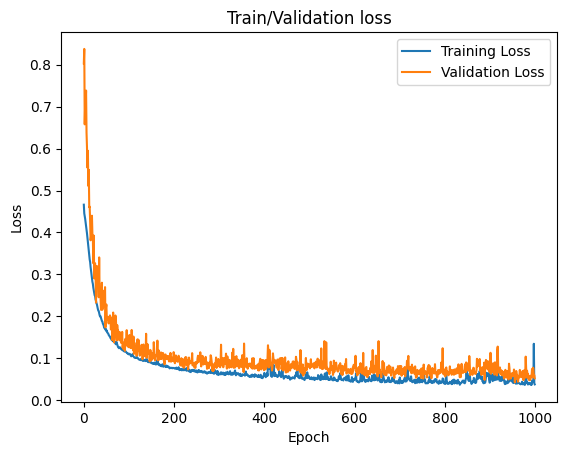

In [14]:
plot_history(history_3)

In [15]:
np.array(history_3.history['val_accuracy']).max()

0.9846388101577759

In [16]:
X_test = pd.read_csv("../cleaned_data/brfss_2022_X_test.csv").drop(columns = 'Unnamed: 0')
y_test = pd.read_csv("../cleaned_data/brfss_2022_y_test.csv").drop(columns = 'Unnamed: 0')

In [17]:
model_nn_3.evaluate(X_test,y_test)

1286/1286 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9483 - loss: 0.2377


[0.24497318267822266, 0.9474822878837585]

In [18]:
model_nn_2.evaluate(X_test,y_test)

1286/1286 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9549 - loss: 0.7097


[0.75342857837677, 0.9541411399841309]

In [19]:
model_nn_1.evaluate(X_test,y_test)

1286/1286 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9104 - loss: 0.5356


[0.5457569360733032, 0.911077082157135]

In [20]:
model_nn_3.save("../models/nn_model.keras")

In [21]:
model_nn_2.save("../models/nn_model_2.keras")